In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis as Prot
import scipy.stats as st

In [2]:
# load data
data = pd.read_excel('Tables/SI Table4.xlsx',skiprows=2)

In [3]:
loci = list(dict.fromkeys(data.Locus.to_list()))

In [4]:
data.columns

Index(['Unique_tile_ID', 'Locus', 'Tile_position_in_parent_protein', 'DNA',
       'protein', 'Predicted_activation_PADDLE', 'Z-score_PADDLE',
       'Activity_1mil_GFP_sort', 'reads_1mil_GFP_sort',
       'Activity_500k_GFP_sort', 'reads_500k_GFP_sort', 'log2_activity',
       'log2_predicted_activity'],
      dtype='object')

In [7]:

# For looking at 1amino acid gained/lost
# For every tile that has a consecutive tile (52 amino acid overlap) the delta in activity  and the amino acid lost/gained during the 1 amino acid frame shift is calculated
fin = []
for x in loci:
    inter = []
    df_sub = data[data['Locus']==x]
    
    if df_sub.shape[0]==1:
        continue
    df_sub = df_sub.sort_values(by='Tile_position_in_parent_protein',ascending=True)
    save = 0
    for y in df_sub.iterrows():
        if save == 0:
            save = y[1].Tile_position_in_parent_protein
            continue
        elif y[1].Tile_position_in_parent_protein == df_sub.Tile_position_in_parent_protein.to_list()[-1]:
            lost = df_sub[df_sub['Tile_position_in_parent_protein']==save].protein.values[0][0]
            gained = y[1].protein[-1]
            deltaactivity = float(y[1].log2_activity)-float(df_sub[df_sub['Tile_position_in_parent_protein']==save].log2_activity.values[0])
            save = y[1].Tile_position_in_parent_protein
            inter.append([y[1].Locus,y[1].Tile_position_in_parent_protein,lost,gained,deltaactivity])
        elif y[1].Tile_position_in_parent_protein - save !=1:
            continue
        else:
            lost = df_sub[df_sub['Tile_position_in_parent_protein']==save].protein.values[0][0]
            gained = y[1].protein[-1]
            deltaactivity = float(y[1].log2_activity)-float(df_sub[df_sub['Tile_position_in_parent_protein']==save].log2_activity.values[0])
            save = y[1].Tile_position_in_parent_protein
            inter.append([y[1].Locus,y[1].Tile_position_in_parent_protein,lost,gained,deltaactivity])
    df_inter = pd.DataFrame(inter,columns = ['Locus','Position','Lost','Gained','dActivity'])
    fin.append(df_inter)

In [8]:
df_change = pd.concat(fin)

In [9]:
df_change['pairs']=df_change.Lost+df_change.Gained

In [10]:
avg_lost = []
for x in list(dict.fromkeys(df_change.Lost.to_list())):
    avg_lost.append([x,df_change[df_change.Lost == x].dActivity.mean()])
    

In [11]:
avg_gained = []
for x in list(dict.fromkeys(df_change.Gained.to_list())):
    avg_gained.append([x,df_change[df_change.Gained == x].dActivity.mean()])
    

In [12]:
df_avg_gained = pd.DataFrame(avg_gained,columns=['gained','mean_dactivity'])
df_avg_gained = df_avg_gained.sort_values(by='mean_dactivity',ascending=True)
df_avg_lost = pd.DataFrame(avg_lost,columns=['lost','mean_dactivity'])
df_avg_lost = df_avg_lost.sort_values(by='mean_dactivity',ascending=True)

<Axes: xlabel='Gained', ylabel='dActivity'>

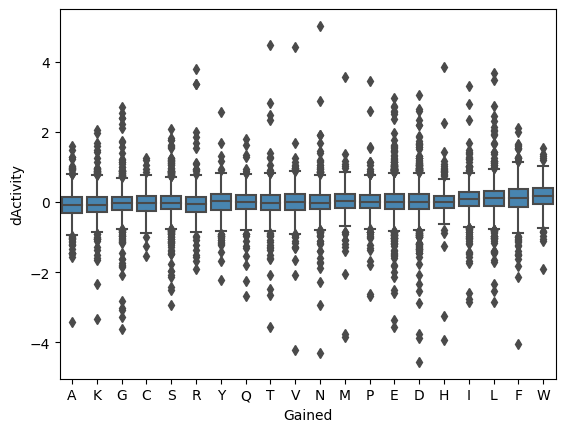

In [15]:
# Figure 2 E
sns.boxplot(df_change,x='Gained',y='dActivity',color='#3788C1',order=df_avg_gained.gained.to_list())
#plt.savefig('Figures/Gained_aa_deltaact_finaldata.pdf')

<Axes: xlabel='Lost', ylabel='dActivity'>

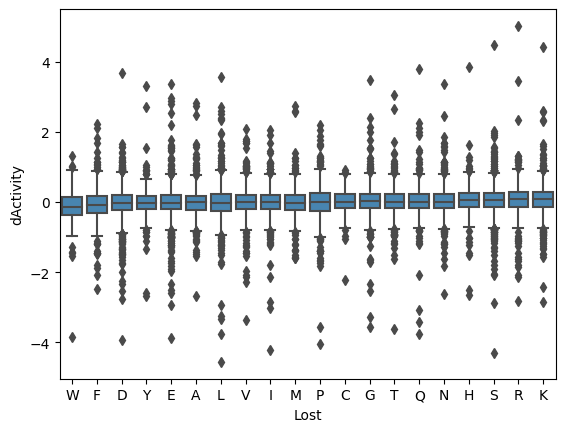

In [16]:
# Figure 2 F
sns.boxplot(df_change,x='Lost',y='dActivity',color='#3788C1',order=df_avg_lost.lost.to_list())
#plt.savefig('Figures/Lost_aa_deltaact_finaldata.pdf')